In [ ]:
import os
import pickle
import numpy as np
import tensorflow as tf
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, Rescaling
import matplotlib.image as mpimg
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

link dataset: https://drive.google.com/drive/folders/1knupxABfBEOSsKSdV7WguxCrMRj9ICoY?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Verifikasi Keaslian Uang**

In [ ]:
KEASLIAN_DIR = '/content/drive/Shared drives/Capstone Project/Machine Learning Inventory/Dataset/dataset_authenticity/'

In [ ]:
keaslian_path = os.path.join(KEASLIAN_DIR, 'train')

In [ ]:
# List semua kelas (subfolder)
classes = sorted(os.listdir(keaslian_path))

# Dictionary untuk menyimpan jumlah data di setiap kelas
data_count = {}

# Hitung jumlah file di setiap kelas
for cls in classes:
    class_path = os.path.join(keaslian_path, cls)
    if os.path.isdir(class_path):
        num_files = len(os.listdir(class_path))
        data_count[cls] = num_files

# Tampilkan hasil
for cls, count in data_count.items():
    print(f"Kelas {cls}: {count} file")

# Menampilkan total keseluruhan file
total_files = sum(data_count.values())
print(f"\nTotal file dalam dataset: {total_files}")

Kelas ASLI: 77 file
Kelas PALSU: 77 file

Total file dalam dataset: 154


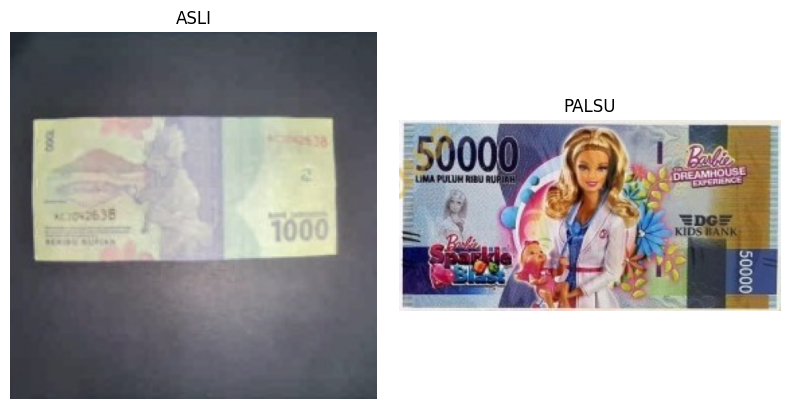

In [ ]:
# Mendapatkan daftar subfolder (kelas)
classes = sorted(os.listdir(keaslian_path))

# Menentukan jumlah kolom dan baris
num_classes = len(classes)
ncols = 4
nrows = (num_classes + ncols - 1) // ncols  # Menghitung jumlah baris yang diperlukan

# Mengatur ukuran plot
plt.figure(figsize=(16, nrows * 4))

for i, cls in enumerate(classes):
    cls_path = os.path.join(keaslian_path, cls)
    # Memilih satu gambar dari subfolder
    sample_image = os.listdir(cls_path)[0]
    image_path = os.path.join(cls_path, sample_image)

    # Membaca dan menampilkan gambar
    img = mpimg.imread(image_path)
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Training

In [ ]:
# Data generator untuk keaslian uang
keaslian_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_keaslian = keaslian_datagen.flow_from_directory(
    keaslian_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
val_keaslian = keaslian_datagen.flow_from_directory(
    keaslian_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 124 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
# Model CNN untuk keaslian uang
model_keaslian = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer dengan sigmoid
])

# Compile model
model_keaslian.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_keaslian.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(f'Input shape: {model_keaslian.input_shape}')
print(f'Output shape: {model_keaslian.output_shape}')

Input shape: (None, 224, 224, 3)
Output shape: (None, 1)


In [ ]:
# Pelatihan model
history_keaslian = model_keaslian.fit(
	train_keaslian,
	epochs=30,
	validation_data=val_keaslian
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step - accuracy: 0.4953 - loss: 0.8881 - val_accuracy: 0.5000 - val_loss: 0.8078
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 171ms/step - accuracy: 0.5782 - loss: 0.6729 - val_accuracy: 0.5667 - val_loss: 0.4964
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.8099 - loss: 0.4592 - val_accuracy: 0.7667 - val_loss: 0.3528
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.8622 - loss: 0.2712 - val_accuracy: 1.0000 - val_loss: 0.1097
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.9717 - loss: 0.0734 - val_accuracy: 0.9333 - val_loss: 0.0926
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.9841 - loss: 0.0416 - val_accuracy: 0.9333 - val_loss: 0.0861
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.9913 - loss: 0.0338 - val_accuracy: 1.0000 - val_loss: 0.0110
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.9913 - loss: 0.0127 - val_accuracy: 1.0000 - val_loss: 0.0236
Epoch 

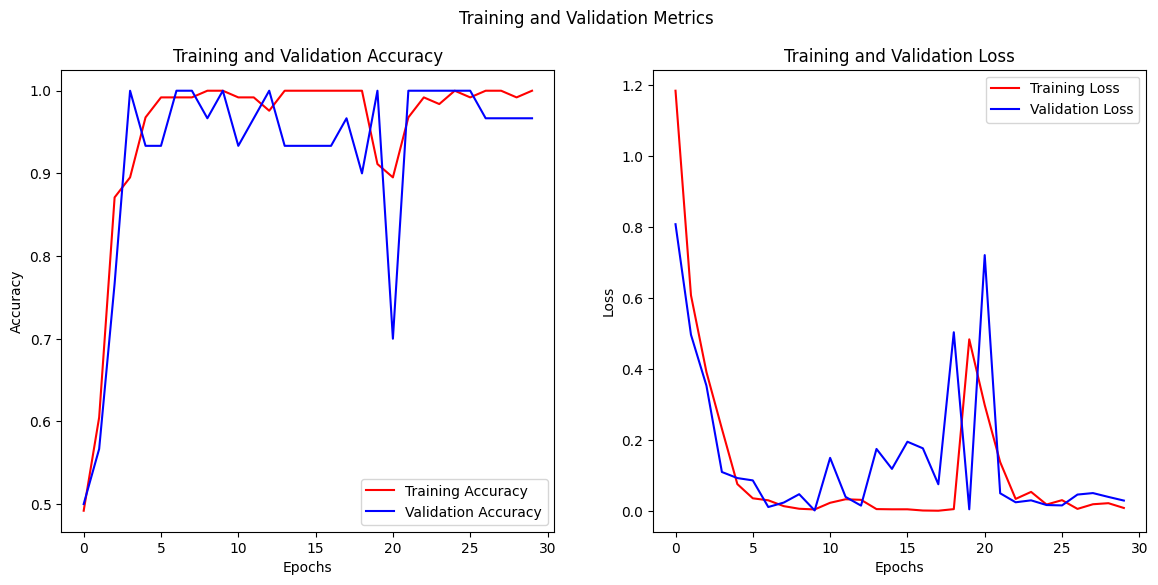

In [ ]:
# Mendapatkan data akurasi dan loss dari history
acc = history_keaslian.history['accuracy']
val_acc = history_keaslian.history['val_accuracy']
loss = history_keaslian.history['loss']
val_loss = history_keaslian.history['val_loss']

# Mendapatkan jumlah epoch
epochs = range(len(acc))

# Membuat dua plot berdampingan
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Training and Validation Metrics')

# Loop untuk membuat plot akurasi dan loss
for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel(label)
    ax[i].set_title(f'Training and Validation {label}')

plt.show()

In [ ]:
# Mengambil data akurasi dan akurasi validasi dari history
acc = history_keaslian.history['accuracy']
val_acc = history_keaslian.history['val_accuracy']

# Menghitung rata-rata akurasi
avg_acc = np.mean(acc)
avg_val_acc = np.mean(val_acc)

print(f"Rata-rata akurasi training: {avg_acc:.4f}")
print(f"Rata-rata akurasi validasi: {avg_val_acc:.4f}")

Rata-rata akurasi training: 0.9500
Rata-rata akurasi validasi: 0.9244


In [ ]:
# Simpan model ke dalam file .h5
model_keaslian.save('model_autenticity.h5')

## Testing

In [ ]:
keaslian_test_path = os.path.join(KEASLIAN_DIR, 'test')

In [ ]:
# Load model yang sudah disimpan
model_keaslian = tf.keras.models.load_model('model_autenticity.h5')

In [ ]:
# Data generator untuk testing keaslian
test_keaslian_datagen = ImageDataGenerator(rescale=1./255)
test_keaslian = test_keaslian_datagen.flow_from_directory(
    keaslian_test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Sama dengan training
    shuffle=False
)

Found 55 images belonging to 2 classes.


In [ ]:
# Prediksi keaslian
keaslian_predictions = model_keaslian.predict(test_keaslian)
keaslian_pred_classes = (keaslian_predictions > 0.5).astype(int).flatten()  # Binarisasi output

# Mapping kelas
class_indices_keaslian = {v: k for k, v in test_keaslian.class_indices.items()}
predicted_keaslian_labels = [class_indices_keaslian[i] for i in keaslian_pred_classes]

# Evaluasi
loss_keaslian, acc_keaslian = model_keaslian.evaluate(test_keaslian)
print(f"Akurasi Keaslian: {acc_keaslian:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step - accuracy: 0.9636 - loss: 0.7111
Akurasi Keaslian: 0.95


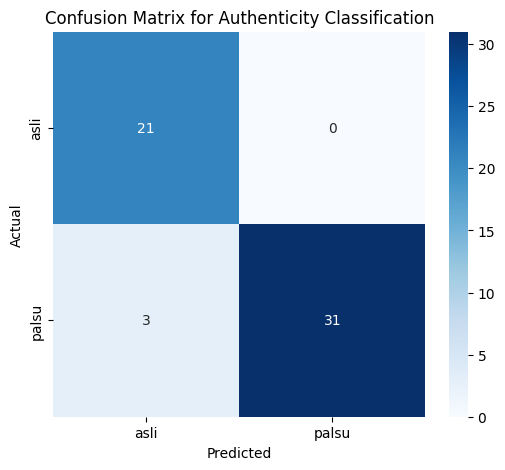

Classification Report for Authenticity:
              precision    recall  f1-score   support

        asli       0.88      1.00      0.93        21
       palsu       1.00      0.91      0.95        34

    accuracy                           0.95        55
   macro avg       0.94      0.96      0.94        55
weighted avg       0.95      0.95      0.95        55



In [ ]:
# Confusion matrix keaslian
cm_keaslian = confusion_matrix(test_keaslian.classes, keaslian_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_keaslian, annot=True, fmt='d', xticklabels=list(test_keaslian.class_indices.keys()),
            yticklabels=list(test_keaslian.class_indices.keys()), cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Authenticity Classification')
plt.show()

# Classification report keaslian
print("Classification Report for Authenticity:")
print(classification_report(test_keaslian.classes, keaslian_pred_classes, target_names=list(test_keaslian.class_indices.keys())))

## Predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


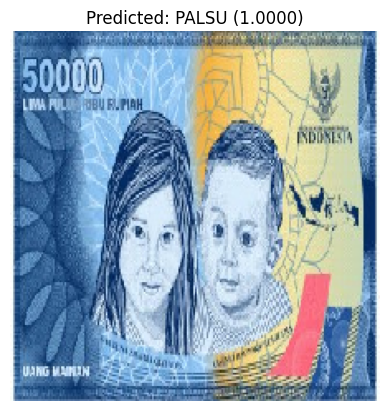

Predicted class: PALSU with probability: 1.0000


In [ ]:
# Path gambar untuk prediksi
img_path = '50.jpg'

# Nama kelas
class_names = ['ASLI', 'PALSU']

# Ukuran target gambar
target_size = (224, 224)

# 1. Memuat dan memproses gambar
img = image.load_img(img_path, target_size=target_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Menambahkan batch dimension
img_array /= 255.0  # Normalisasi nilai piksel ke [0, 1]

# 2. Melakukan prediksi dengan model
prediction = model_keaslian.predict(img_array)[0][0]  # Mengambil probabilitas hasil prediksi

# 3. Menentukan kelas berdasarkan probabilitas
predicted_class = class_names[int(prediction > 0.5)]  # Menggunakan threshold 0.5
predicted_prob = prediction

# 4. Menampilkan gambar dan hasil prediksi
plt.imshow(img)
plt.title(f"Predicted: {predicted_class} ({predicted_prob:.4f})")
plt.axis('off')
plt.show()

# 5. Menampilkan hasil prediksi
print(f"Predicted class: {predicted_class} with probability: {predicted_prob:.4f}")

In [ ]:
# Path untuk menyimpan model TFLite
tflite_model_path = 'model_autenticity.tflite'

# Mengonversi model ke format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model_keaslian)
tflite_model = converter.convert()

# Menyimpan model TFLite ke file
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print(f"Model berhasil dikonversi ke TFLite dan disimpan di {tflite_model_path}")

Saved artifact at '/tmp/tmptzlxs3ph'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132477462152112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132477462157040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132477462234384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132477462237904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132477462246704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132477462247408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132477195704752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132477195705632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132477195713728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132477195710560: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model berhasil di